In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
from wordcloud import WordCloud
import tensorflow as tf
from collections import Counter
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import Embedding, Flatten, BatchNormalization, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Bidirectional, Dense, GlobalMaxPooling1D, Dropout


In [4]:
df = pd.read_csv("../data/60000correctly labled data.csv")
df.head()

,texts,labels
0,ኢህአዴግና ኤርትራ ወይስ ኢትዮጲያና ሻዕቢያ,Neutral
1,ፈጣሪ ይባርካቹ,Positive
2,ጎሽ ተባረኩ የምታቃትሉትን ሚያገለግል ነገር ሁሉ እንዲህ ላሉ ድርጅቶች ስጡ,Positive
3,ጥሩ ነው ግን ሌሎቹንም ተመልከቱ,Positive
4,መሬት ጠብ እሚል ነገር አላየነም ያው ሙሥናው ቀጥሉአል ሥራ አጡ ኑሮ ውድ...,Negative


In [5]:
df.labels.value_counts()

Negative    16856
Positive    16624
Neutral     16526
Name: labels, dtype: int64

In [6]:
df = pd.read_csv("../data/70000correctly labled data.csv")
df.head()

,texts,sentiment
0,ኢህአዴግና ኤርትራ ወይስ ኢትዮጲያና ሻዕቢያ,Neutral
1,ፈጣሪ ይባርካቹ,Positive
2,ጎሽ ተባረኩ የምታቃትሉትን ሚያገለግል ነገር ሁሉ እንዲህ ላሉ ድርጅቶች ስጡ,Positive
3,ጥሩ ነው ግን ሌሎቹንም ተመልከቱ,Positive
4,መሬት ጠብ እሚል ነገር አላየነም ያው ሙሥናው ቀጥሉአል ሥራ አጡ ኑሮ ውድ...,Negative


In [8]:
df.sentiment.value_counts()

Positive    24948
Neutral     23842
Negative    20728
labels          1
Name: sentiment, dtype: int64

In [13]:
# df["sentiment"] = df["sentiment"].str.replace("strongNegative", "negative", regex=True)
df_redu = df[(df.sentiment != "Neutral") & (df.sentiment != "labels")] 


In [14]:
df_redu.sentiment.value_counts()

Positive    24948
Negative    20728
Name: sentiment, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12064 non-null  object
 1   1       12064 non-null  object
dtypes: object(2)
memory usage: 188.6+ KB


In [5]:
df.rename(columns={0:"texts", 1:"labels"}, inplace=True)

In [5]:
df.labels.value_counts()

negative    5638
neutral     3265
positive    3161
Name: labels, dtype: int64

In [27]:
df.to_csv("../data/cleaned_data_der_2.csv")

In [6]:
df2 = pd.read_csv("../data/amahric_testdata.csv")
df2["labels"] = df2["labels"].str.strip()
df2["labels"] = df2["labels"].str.replace("strongNegative", "negative", regex=True)
# df["labels"] = df["labels"].str.replace("neutral", "positive", regex=True)
df2["labels"] = df2["labels"].str.replace("strongPositive", "positive", regex=True)


In [7]:
df2["labels"] = df2["labels"].str.replace("neutral", "positive", regex=True)


In [8]:
df2.labels.value_counts()

positive    14524
negative    14154
Name: labels, dtype: int64

In [9]:
df_redu = df2.copy()

In [10]:
df3 = pd.concat([df, df2], axis=0)

NameError: name 'df' is not defined

In [2]:
df = pd.read_csv("../data/new_data.csv")
df["labels"] = df["labels"].str.strip()
df["labels"] = df["labels"].str.replace("neutra", "neutral", regex=True)
df["labels"] = df["labels"].str.replace("neutrall", "neutral", regex=True)

df.labels.value_counts()


negative    21914
positive    16063
neutral     12043
Name: labels, dtype: int64

In [4]:
df_redu = df[df.labels != "neutral"]

In [3]:
df_new_neg = df[df.labels == "negative"][:16063]
df_new_pos = df[df.labels == "positive"]
df_redu = pd.concat([df_new_neg, df_new_pos])
df_redu.labels.value_counts()


negative    16063
positive    16063
Name: labels, dtype: int64

In [9]:
df3["labels"] = df3["labels"].str.replace("neutral", "positive", regex=True)
df_redu = df3.sample(frac=1).reset_index(drop=True)
df_redu.head()


,texts,labels
0,ወደር የለሽ አሽቄ,negative
1,ብታመልክ ለራስህ ባታመልክ ለራስህ መጀመሪያ የክርስትና ትርጉሙ አልገባችሁ...,negative
2,መብት ከማን እናስከብር??የምንግስተ ቢሮዎች ናቸው እኛን እሚበድሉት፡፡,negative
3,እባብ ቆዳውን ቢቀይርም ያው እባብ ነው ይሄ ማስመሰል ነው ሃገራችንን የጎዳት,positive
4,በደነው ቀን የተስራ አስፓልት በፈርስ ኩማ ሊያፈርሱት ነው,negative


In [7]:
new = False
if new:
    df1 = pd.read_csv("../data/cleaned_data_der_2.csv")
    df2 = pd.read_csv("../data/amahric_testdata.csv")
    df2["labels"] = df2["labels"].str.strip()
    df2["labels"] = df2["labels"].str.replace("strongNegative", "negative", regex=True)
    # df["labels"] = df["labels"].str.replace("neutral", "positive", regex=True)
    df2["labels"] = df2["labels"].str.replace("strongPositive", "positive", regex=True)
    df = pd.concat([df1, df2], axis=0)
    df["labels"] = df["labels"].str.replace("neutral", "positive", regex=True)

    # df_redu.labels.value_counts()
else:
    df = pd.read_csv("../data/amahric_testdata.csv")
    df["labels"] = df["labels"].str.strip()
    df["labels"] = df["labels"].str.replace("strongNegative", "negative", regex=True)
    df["labels"] = df["labels"].str.replace("neutral", "positive", regex=True)
    df["labels"] = df["labels"].str.replace("strongPositive", "positive", regex=True)

df.labels.value_counts()

# df.tail()

positive    14524
negative    14154
Name: labels, dtype: int64

In [8]:
df_redu = df.copy()
df_redu.labels.value_counts()

positive    14524
negative    14154
Name: labels, dtype: int64

In [15]:
STOP_WORDS = set(
    """
ግን አንቺ አንተ እናንተ ያንተ ያንቺ የናንተ ራስህን ራስሽን ራሳችሁን
ሁሉ ኋላ በሰሞኑ አሉ በኋላ ሁኔታ በኩል አስታውቀዋል ሆነ በውስጥ
አስታውሰዋል ሆኑ ባጣም እስካሁን ሆኖም በተለይ አሳሰበ ሁል በተመለከተ
አሳስበዋል ላይ በተመሳሳይ አስፈላጊ ሌላ የተለያየ አስገነዘቡ ሌሎች የተለያዩ
አስገንዝበዋል ልዩ ተባለ አብራርተዋል መሆኑ ተገለጸ አስረድተዋል  ተገልጿል
ማለቱ ተጨማሪ እባክህ የሚገኝ ተከናወነ እባክሽ ማድረግ ችግር አንጻር ማን
ትናንት እስኪደርስ ነበረች እንኳ ሰሞኑን ነበሩ እንኳን ሲሆን ነበር እዚሁ ሲል
ነው እንደገለጹት አለ ና እንደተናገሩት ቢሆን ነገር እንዳስረዱት ብለዋል ነገሮች
እንደገና ብዙ ናት ወቅት ቦታ ናቸው እንዲሁም በርካታ አሁን እንጂ እስከ
ማለት የሚሆኑት ስለማናቸውም ውስጥ ይሆናሉ ሲባል ከሆነው ስለዚሁ ከአንድ
ያልሆነ ሳለ የነበረውን ከአንዳንድ በማናቸውም በሙሉ የሆነው ያሉ በእነዚሁ
ወር መሆናቸው ከሌሎች በዋና አንዲት ወይም
በላይ እንደ በማቀድ ለሌሎች በሆኑ ቢሆንም ጊዜና  ይሆኑበታል በሆነ አንዱ
ለዚህ ለሆነው ለነዚህ ከዚህ የሌላውን ሶስተኛ አንዳንድ ለማንኛውም የሆነ ከሁለት
የነገሩ ሰኣት አንደኛ እንዲሆን እንደነዚህ ማንኛውም ካልሆነ የሆኑት  ጋር ቢያንስ
ይህንንም እነደሆነ እነዚህን ይኸው  የማናቸውም
በሙሉም ይህችው በተለይም አንዱን የሚችለውን በነዚህ ከእነዚህ በሌላ
የዚሁ ከእነዚሁ ለዚሁ በሚገባ ለእያንዳንዱ የአንቀጹ ወደ ይህም ስለሆነ ወይ
ማናቸውንም ተብሎ እነዚህ መሆናቸውን የሆነችን ከአስር ሳይሆን ከዚያ የለውም
የማይበልጥ እንደሆነና እንዲሆኑ  በሚችሉ ብቻ ብሎ ከሌላ የሌላቸውን
ለሆነ በሌሎች ሁለቱንም በቀር ይህ በታች አንደሆነ በነሱ
ይህን የሌላ እንዲህ ከሆነ ያላቸው በነዚሁ በሚል የዚህ ይህንኑ
በእንደዚህ ቁጥር ማናቸውም ሆነው ባሉ በዚህ በስተቀር ሲሆንና
በዚህም መሆን ምንጊዜም እነዚህም በዚህና ያለ ስም
ሲኖር ከዚህም መሆኑን በሁኔታው የማያንስ እነዚህኑ ማንም ከነዚሁ
ያላቸውን እጅግ ሲሆኑ ለሆኑ ሊሆን  ለማናቸውም እና ነዉ
""".split()
)


In [29]:
X = df_redu.texts.values
labels = df_redu.sentiment.values
encoded_labels = []
for label in labels:
    if label == "Negative":
        encoded_labels.append(0)
    else:
        encoded_labels.append(1)
y = np.array(encoded_labels)

In [30]:
def filter_stop_words(ls):
    new_ls_stop = []
    for input in ls:
        cleaned = [w for w in input.split(" ") if not w in STOP_WORDS]
        new_ls_stop.append(" ".join(cleaned).strip())

    return new_ls_stop
    
def remove_emojis(ls):
    new_ls = []
    for input in ls:
        new_ls.append(emoji.replace_emoji(input)
)
    return new_ls
    
def remove_punc_and_special_chars(ls): 
    new_ls = []
    for text in ls:
        text = str(text)
        normalized_text = re.sub('[\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\;\“\”\›\’\‘\"\'\:\,\.\‹\/\<\>\?\\\\|\`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣]', '',text)
        new_ls.append(normalized_text)
    return new_ls

def remove_ascii_and_numbers(ls):
    new_ls = []
    for text_input in ls:
        text_input = str(text_input)
        rm_num_and_ascii=re.sub('[A-Za-z0-9]','',text_input)
        text = re.sub('[\'\u1369-\u137C\']+','',rm_num_and_ascii)
        new_ls.append(text)
    return new_ls

def normalize_char_level_missmatch(ls):
        new_ls = []
        for input_token in ls:
                input_token = str(input_token)
                rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
                rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
                rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
                rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
                rep5=re.sub('[ሕኅ]','ህ',rep4)
                rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
                rep7=re.sub('[ሠ]','ሰ',rep6)
                rep8=re.sub('[ሡ]','ሱ',rep7)
                rep9=re.sub('[ሢ]','ሲ',rep8)
                rep10=re.sub('[ሣ]','ሳ',rep9)
                rep11=re.sub('[ሤ]','ሴ',rep10)
                rep12=re.sub('[ሥ]','ስ',rep11)
                rep13=re.sub('[ሦ]','ሶ',rep12)
                rep14=re.sub('[ዓኣዐ]','አ',rep13)
                rep15=re.sub('[ዑ]','ኡ',rep14)
                rep16=re.sub('[ዒ]','ኢ',rep15)
                rep17=re.sub('[ዔ]','ኤ',rep16)
                rep18=re.sub('[ዕ]','እ',rep17)
                rep19=re.sub('[ዖ]','ኦ',rep18)
                rep20=re.sub('[ጸ]','ፀ',rep19)
                rep21=re.sub('[ጹ]','ፁ',rep20)
                rep22=re.sub('[ጺ]','ፂ',rep21)
                rep23=re.sub('[ጻ]','ፃ',rep22)
                rep24=re.sub('[ጼ]','ፄ',rep23)
                rep25=re.sub('[ጽ]','ፅ',rep24)
                rep26=re.sub('[ጾ]','ፆ',rep25)
                #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
                rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
                rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
                rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
                rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
                rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
                rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
                rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
                rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
                rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
                rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
                rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
                rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
                rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
                rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
                rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
                rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
                rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
                rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
                rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
                rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
                rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
                rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
                new_ls.append(rep48)
        return new_ls


In [31]:
X = normalize_char_level_missmatch(X)
X = remove_punc_and_special_chars(X)
X = remove_ascii_and_numbers(X)
X = remove_emojis(X)
X = filter_stop_words(X)

len(X)

46553

In [32]:
X

['ፈጣሪ ይባርካቹ',
 'ጎሽ ተባረኩ የምታቃትሉትን ሚያገለግል ላሉ ድርጅቶች ስጡ',
 'ጥሩ ሌሎቹንም ተመልከቱ',
 'መሬት ጠብ እሚል አላየነም ያው ሙስናው ቀጥሏል ስራ አጡ ኑሮ ውድነቱ ተባብሶ ቀጥሏል',
 'ይገርማል  የአፀይ ቴድሮስ ልጆች ቅማንቶች በአንድ ጉድጎድ ተቀብሮ ሴገኙ ያላወገዘ አንዳችም ያለለ ስለኬንያ ሽብር ልያወግዝ ሞራል',
 'ከውጩ ጉዞ ትንሽ ቀነስ አድርጎ ምናለበት የህወሀትን አጥፊ ግለሰቦችና ድርቶች የተወሸቁ ግለሰቦችን አድኖ ቢይዝልን መሮጥ ምን ያደርጋል',
 'አነሱ መግደል መሽነፍ ማስር መሽነፍ',
 'የኛ ጀግና የኦሮሚያ ፖሊስ ኢትዮጵያዊነቱን ያስመሰከረ ጀግና',
 'ዋው በጣም ምርጥ ተግባር ከህዝብ ህዝብ',
 'መሪይ ሁሉን አሳክተህ በሰላም እንድትመጣ ምኞቴ እንወድሀለን',
 'በርቱ ጀግኒት',
 'ጀግኒት',
 'የገቢዎች ሚኒስቴር  የምግብ ዘይትና ስኳር ድጋፍን ለመቄዶንያ የአረጋዉያንና የአእምሮ ህሙማን መርጃ ማእከል አደረገ',
 'አረ ሌሎችንም ምነው ጎብኛቸው ኢትዮጵያ ያለው መቄዶንያ አይደለም አንድ መረባረብ ትወዳላችሁ',
 'አረ ሌሎችም እኮ የአረጋዉያን የአእምሮ ህሙማን መርጃ ማህከል እነሱም ጎራ እያላችሁ  የቢኒን መልካም ስራ ከማንም እወድለታለዉ እሱ የኢትዮጵያ ትልቅ ሰዉ ቢኒዬ እግዚአብሄር እረጅም እድሜ ከጤና እመኝላለዉ',
 'መቸም የተወረሰ የሚሆነው',
 'እኔ እኮ እንደተለመደው ሚሊየን የሚያወጣ እቃ በኮንትሮባንድ ምናምን ሊል ብየ',
 'መልካም ሁሉም በመስመሩ ግብር ከፋዪ ባገኘው መጠን የማያስመርር ግብር ከተጠየቀ ሁሉም ደስተኛ ሆኖ በሰአቱ የሚከፍል ይመስለኛል ያደረጋችሁት መልካም እግዚአብሄር ይስጣችሁ',
 'ዋው ጥሩ ጅማሮ ገቢዎች',
 'እግዚአብሄር ይባርክሽ',
 'መልካም ይቀጥል',
 'ነፃ አውጪ ነኝ ስል ከሊቢያ ወይስ ከ

In [33]:
df_clean = pd.DataFrame()
df_clean["clean"] = pd.DataFrame(X)
df_clean["labels"] = pd.DataFrame(y)
df_clean.head()

,clean,labels
0,ፈጣሪ ይባርካቹ,1
1,ጎሽ ተባረኩ የምታቃትሉትን ሚያገለግል ላሉ ድርጅቶች ስጡ,1
2,ጥሩ ሌሎቹንም ተመልከቱ,1
3,መሬት ጠብ እሚል አላየነም ያው ሙስናው ቀጥሏል ስራ አጡ ኑሮ ውድነቱ ተባ...,0
4,ይገርማል የአፀይ ቴድሮስ ልጆች ቅማንቶች በአንድ ጉድጎድ ተቀብሮ ሴገኙ ...,0


In [34]:
print("Creating word clouds...")
negative_words = " ".join(df_clean[df_clean.labels ==0]['clean'].values)
postive_words = " ".join(df_clean[df_clean.labels == 1]['clean'].values)
# words =" ".join(df_clean['clean'].values)



Creating word clouds...


In [35]:
len(postive_words)

2676537

In [36]:
len(negative_words)

1124128

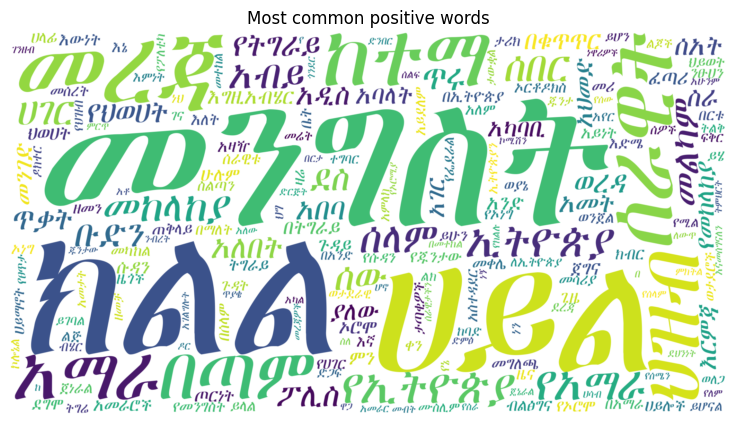

In [37]:

positive_wordcloud = WordCloud(font_path='../fonts/jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(postive_words)

plt.figure(figsize=(10,5))
plt.imshow(positive_wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.title("Most common positive words")
plt.show()

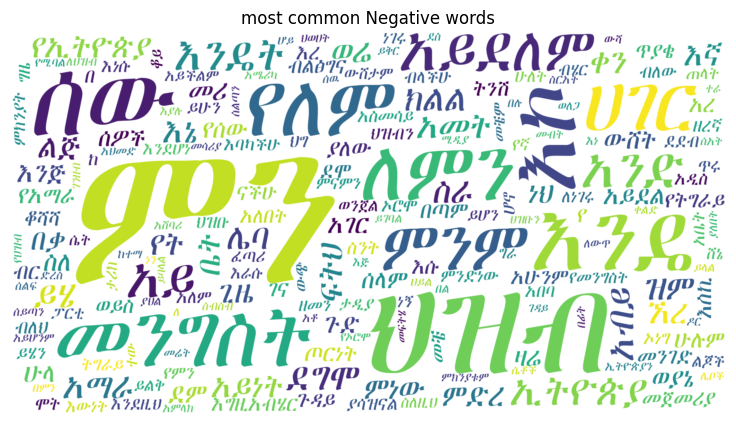

In [38]:
wordcloud = WordCloud(font_path='../fonts/jiretsl.ttf',
                      relative_scaling = 1.0,
                      min_font_size=4,
                      background_color="white",
                      width=744,
                      height=400,
                      scale=3,
                      font_step=1,
                      collocations=False,
                      margin=2
                      ).generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.title("most common Negative words")
plt.show()


In [74]:
import numpy as np
import fasttext
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Define the maximum length of each sequence
max_len = 10
max_words = 50000

# Define the tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

# Convert the texts to sequences and pad them
train_sequences = tokenizer.texts_to_sequences(X)
train_data = pad_sequences(train_sequences, maxlen=10, padding='post')

word_vectors = fasttext.load_model("cc.am.100.bin")

# Define the maximum number of words to keep
max_words = 50000


# # Extract the embedding matrix from the FastText model
embedding_dim = word_vectors.get_dimension()
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(train_sequences, y, test_size=0.2, random_state=42)

In [42]:
X_train[4]

[113, 19422]

In [31]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-am-sv", use_fast=True)

/home/sam/Documents/projects/setiment analysis/sentiment/lib/python3.7/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [23]:
result = tokenizer(X)

Token indices sequence length is longer than the specified maximum sequence length for this model (516 > 512). Running this sequence through the model will result in indexing errors


In [24]:
# result["input_ids"][1]
# new_ls = []
# for i in result["input_ids"]:
#     new_ls.append(i)
    # print(i)
    # break
maxlen = 10
X = pad_sequences(result["input_ids"], padding='post', maxlen=maxlen)
# new_ls
X

array([[14269,  4961,   197, ...,     0,     0,     0],
       [10949,   510, 16850, ...,    11,  6080,     0],
       [   11, 21046,   353, ...,  8336,  3745,     0],
       ...,
       [ 9738,   735,   512, ...,  4090,    52,     0],
       [   11,    38, 27229, ...,   175,  2053,     0],
       [  123,  3526,  3661, ..., 33009,  1155,     0]], dtype=int32)

In [79]:
len(X)

28682

In [75]:
train_data = pad_sequences(train_sequences, maxlen=10, padding='post')
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)

In [76]:
X_train[4]

array([  18, 5859,   76,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [78]:
lstm_model = Sequential()
lstm_model.add((Embedding(max_words + 1,
                    embedding_dim,
                    embeddings_initializer='glorot_uniform',
                    input_length=max_len,
                    weights=[embedding_matrix],
                    trainable=False)))
lstm_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
359/359 [==============================] - 6s 10ms/step - loss: 0.6078 - accuracy: 0.6627 - val_loss: 0.5821 - val_accuracy: 0.6826
Epoch 2/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5854 - accuracy: 0.6818 - val_loss: 0.5819 - val_accuracy: 0.6814
Epoch 3/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5822 - accuracy: 0.6841 - val_loss: 0.5730 - val_accuracy: 0.6864
Epoch 4/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5778 - accuracy: 0.6858 - val_loss: 0.5828 - val_accuracy: 0.6859
Epoch 5/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5745 - accuracy: 0.6890 - val_loss: 0.5748 - val_accuracy: 0.6927
Epoch 6/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5697 - accuracy: 0.6923 - val_loss: 0.5689 - val_accuracy: 0.6897
Epoch 7/50
359/359 [==============================] - 3s 9ms/step - loss: 0.5667 - accuracy: 0.6971 - val_loss: 0.5716 - val_accuracy: 0.6857
Epoch

In [36]:
tokenizer.decode(result["input_ids"][4])

'▁ግድ▁ሽልማቱ</s>'

In [11]:
ls = ["ሳም እና ናቲ ነው"]
filter_stop_words(ls)


['ሳም ናቲ']

In [4]:
text = ['ሻደይ የሚለው ቃል ከ ሻይደን የሚል የ ትግርኛ ቃል የመጣ ሻይደን ኣበባየ ሻይደን ከሚል ዘፈን ተወስዶ ከጊዜ ሻደይ ሚለው ተቀየረኣሸንድዬም ኣሸንዳ ለማለት ሽረ ለማለት ሽሬ መቐለ ለማለት መቐሌ ይሉት የለ ኣሸንዳም ኣሸንድዬ ኣሉት ሶለል ደሞ ሰለል ከሚል የ ትግርኛ ቃል የመጣ ሰለል ተጋሩ ከእስክስታው በፊት ክብ ሰርተን የምንጨፍረው ሰለል ኣብሎ ስለል እሚል የድሮ ዘፈን ኣሁንም ይዘፈናልበ ትግራይ ኣጎራባች በቆቦ ኣከባቢ ይዘፈን ነበርኩ ከጊዜ ሰለል ሚለው ሶለል እየተቀየረ ሄደ ይሀው ነውኣዳሜ ንሚድያ ጋጋታ ኝኝ ብትይም ምትጠቀሚው ትግርኛውን']


In [12]:
from amseg.amharicSegmenter import AmharicSegmenter
sent_punct = []
word_punct = []
segmenter = AmharicSegmenter(sent_punct, word_punct)
words = segmenter.amharic_tokenizer(text)


In [13]:
words

['ሻደይ የሚለው ቃል ከ ሻይደን የሚል የ ትግርኛ ቃል የመጣ ሻይደን ኣበባየ ሻይደን ከሚል ዘፈን ተወስዶ ከጊዜ ሻደይ ሚለው ተቀየረኣሸንድዬም ኣሸንዳ ለማለት ሽረ ለማለት ሽሬ መቐለ ለማለት መቐሌ ይሉት የለ ኣሸንዳም ኣሸንድዬ ኣሉት ሶለል ደሞ ሰለል ከሚል የ ትግርኛ ቃል የመጣ ሰለል ተጋሩ ከእስክስታው በፊት ክብ ሰርተን የምንጨፍረው ሰለል ኣብሎ ስለል እሚል የድሮ ዘፈን ኣሁንም ይዘፈናልበ ትግራይ ኣጎራባች በቆቦ ኣከባቢ ይዘፈን ነበርኩ ከጊዜ ሰለል ሚለው ሶለል እየተቀየረ ሄደ ይሀው ነውኣዳሜ ንሚድያ ጋጋታ ኝኝ ብትይም ምትጠቀሚው ትግርኛውን']

In [16]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
X_train = tokenizer.texts_to_sequences(text)


In [17]:
X_train

[[5,
  14,
  2,
  15,
  3,
  16,
  6,
  7,
  2,
  8,
  3,
  17,
  3,
  9,
  10,
  18,
  11,
  5,
  12,
  19,
  20,
  4,
  21,
  4,
  22,
  23,
  4,
  24,
  25,
  26,
  27,
  28,
  29,
  13,
  30,
  1,
  9,
  6,
  7,
  2,
  8,
  1,
  31,
  32,
  33,
  34,
  35,
  36,
  1,
  37,
  38,
  39,
  40,
  10,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  11,
  1,
  12,
  13,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58]]

In [15]:
tokenizer.word_index

{'ሰለል': 1,
 'ቃል': 2,
 'ሻይደን': 3,
 'ለማለት': 4,
 'ሻደይ': 5,
 'የ': 6,
 'ትግርኛ': 7,
 'የመጣ': 8,
 'ከሚል': 9,
 'ዘፈን': 10,
 'ከጊዜ': 11,
 'ሚለው': 12,
 'ሶለል': 13,
 'የሚለው': 14,
 'ከ': 15,
 'የሚል': 16,
 'ኣበባየ': 17,
 'ተወስዶ': 18,
 'ተቀየረኣሸንድዬም': 19,
 'ኣሸንዳ': 20,
 'ሽረ': 21,
 'ሽሬ': 22,
 'መቐለ': 23,
 'መቐሌ': 24,
 'ይሉት': 25,
 'የለ': 26,
 'ኣሸንዳም': 27,
 'ኣሸንድዬ': 28,
 'ኣሉት': 29,
 'ደሞ': 30,
 'ተጋሩ': 31,
 'ከእስክስታው': 32,
 'በፊት': 33,
 'ክብ': 34,
 'ሰርተን': 35,
 'የምንጨፍረው': 36,
 'ኣብሎ': 37,
 'ስለል': 38,
 'እሚል': 39,
 'የድሮ': 40,
 'ኣሁንም': 41,
 'ይዘፈናልበ': 42,
 'ትግራይ': 43,
 'ኣጎራባች': 44,
 'በቆቦ': 45,
 'ኣከባቢ': 46,
 'ይዘፈን': 47,
 'ነበርኩ': 48,
 'እየተቀየረ': 49,
 'ሄደ': 50,
 'ይሀው': 51,
 'ነውኣዳሜ': 52,
 'ንሚድያ': 53,
 'ጋጋታ': 54,
 'ኝኝ': 55,
 'ብትይም': 56,
 'ምትጠቀሚው': 57,
 'ትግርኛውን': 58}

In [16]:
X_train

[[5,
  14,
  2,
  15,
  3,
  16,
  6,
  7,
  2,
  8,
  3,
  17,
  3,
  9,
  10,
  18,
  11,
  5,
  12,
  19,
  20,
  4,
  21,
  4,
  22,
  23,
  4,
  24,
  25,
  26,
  27,
  28,
  29,
  13,
  30,
  1,
  9,
  6,
  7,
  2,
  8,
  1,
  31,
  32,
  33,
  34,
  35,
  36,
  1,
  37,
  38,
  39,
  40,
  10,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  11,
  1,
  12,
  13,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58]]

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-am-sv", use_fast=True)

/home/sam/Documents/projects/setiment analysis/sentiment/lib/python3.7/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [6]:
result = tokenizer(text)

In [14]:
result["input_ids"][1]

IndexError: list index out of range

In [15]:
tokenizer.decode(result["input_ids"][0])

'▁ሻደይ▁የሚለው▁ቃል▁ከ▁ሻይደን▁የሚል▁የ▁ትግርኛ▁ቃል▁የመጣ▁ሻይደን ኣበባየ▁ሻይደን▁ከሚል▁ዘፈን▁ተወስዶ▁ከጊዜ▁ሻደይ▁ሚለው▁ተቀየረኣሸንድዬም ኣሸንዳ▁ለማለት▁ሽረ▁ለማለት▁ሽሬ▁መ<unk> ለ▁ለማለት▁መ<unk> ሌ▁ይሉት▁የለ ኣሸንዳም ኣሸንድዬ ኣሉት▁ሶለል▁ደሞ▁ሰለል▁ከሚል▁የ▁ትግርኛ▁ቃል▁የመጣ▁ሰለል▁ተጋሩ▁ከእስክስታው▁በፊት▁ክብ▁ሰርተን▁የምንጨፍረው▁ሰለል ኣብሎ▁ስለል▁እሚል▁የድሮ▁ዘፈን ኣሁንም▁ይዘፈናልበ▁ትግራይ ኣጎራባች▁በቆቦ ኣከባቢ▁ይዘፈን▁ነበርኩ▁ከጊዜ▁ሰለል▁ሚለው▁ሶለል▁እየተቀየረ▁ሄደ▁ይሀው▁ነውኣዳሜ▁ንሚድያ▁ጋጋታ ኝኝ▁ብትይም▁ምትጠቀሚው▁ትግርኛውን</s>'

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"])

In [36]:
from bpemb import BPEmb
# bpemb_en = BPEmb(lang="am", dim=100)

In [23]:
bpemb_am = BPEmb(lang="am", vs=50000)

In [24]:
bpemb_am

BPEmb(lang=am, vs=50000, dim=100)

In [25]:
## word_embedding using bpemp
word_index = {word: index + 1 for index, word in enumerate(bpemb_am.words)}
sequences = []
for sentence in X:
    sentence_sequence = []
    for word in sentence.split():
        if word in word_index:
            sentence_sequence.append(word_index[word])
    sequences.append(sentence_sequence)

maxlen = 10
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')
import numpy as np

embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = bpemb_am[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [26]:
lstm_model = Sequential()
lstm_model.add(Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
# lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Flatten())
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
padded_sequences

array([[27726,     0,     0, ...,     0,     0,     0],
       [ 1120,  2259,     0, ...,     0,     0,     0],
       [ 3447,     0,     0, ...,     0,     0,     0],
       ...,
       [32575,   279, 18110, ...,     0,     0,     0],
       [  707,     0,     0, ...,     0,     0,     0],
       [  936,  1280,     0, ...,     0,     0,     0]], dtype=int32)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [31]:
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5294 - accuracy: 0.7327 - val_loss: 0.5928 - val_accuracy: 0.7010
Epoch 2/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.7373 - val_loss: 0.6144 - val_accuracy: 0.6966
Epoch 3/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5225 - accuracy: 0.7406 - val_loss: 0.6142 - val_accuracy: 0.6913
Epoch 4/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5196 - accuracy: 0.7419 - val_loss: 0.5971 - val_accuracy: 0.6907
Epoch 5/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.7431 - val_loss: 0.6158 - val_accuracy: 0.6907
Epoch 6/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5172 - accuracy: 0.7428 - val_loss: 0.6077 - val_accuracy: 0.6950
Epoch 7/50
304/304 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.7480 - val_loss: 0.6169 - val_accuracy: 0.6962
Epoch 

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.498755057578587


In [37]:
import fasttext
import fasttext.util
# fasttext.util.download_model('am', if_exists='ignore')
ft = fasttext.load_model('cc.am.300.bin')

In [38]:
ft.get_dimension()

300

In [4]:
fasttext.util.reduce_model(ft, 100)
ft.save_model('cc.am.100.bin')

In [21]:
ft

In [39]:
import numpy as np
def generate_feature_matrix(text_data, word_embedding_model, max_sequence_length):
    feature_matrix = np.zeros((len(text_data), max_sequence_length, word_embedding_model.vector_size))
    for i, text_instance in enumerate(text_data):
        text_instance = text_instance.lower().split()
        for j, word in enumerate(text_instance):
            if word in word_embedding_model:
                feature_matrix[i, j, :] = word_embedding_model[word]
    return feature_matrix

feature_vectors = generate_feature_matrix(X, ft, 10)



AttributeError: '_FastText' object has no attribute 'vector_size'

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten

# Load pre-trained GloVe embeddings
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(100, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build model
model = Sequential()
model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# lstm_model = Sequential()
# lstm_model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=maxlen, trainable=False))
# # lstm_model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
# lstm_model.add(LSTM(32, activation='relu'))
# lstm_model.add(Dropout(0.5))
# lstm_model.add(Flatten())
# lstm_model.add(Dense(1, activation='sigmoid'))
# lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])


In [28]:
import numpy as np
import fasttext
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Load the FastText model
# model_path = 'path/to/fasttext_model.bin'
# word_vectors = fasttext.load_model(model_path)

word_vectors = fasttext.load_model("cc.am.100.bin")

# Define the maximum number of words to keep
max_words = 50000

# # Define the maximum length of each sequence
# max_len = 10

# Define the tokenizer and fit it on the training data
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(X)

# # Convert the texts to sequences and pad them
# train_sequences = tokenizer.texts_to_sequences(X)
# train_data = pad_sequences(train_sequences, maxlen=10)

# # Extract the embedding matrix from the FastText model
embedding_dim = word_vectors.get_dimension()
# word_index = tokenizer.word_index
num_words = min(max_words, len(words)) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in words.items():
    if i >= max_words:
        continue
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

AttributeError: 'list' object has no attribute 'items'

In [20]:


# Define the model architecture
cnn_model = Sequential()
cnn_model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer='glorot_uniform',
                    input_length=10,
                    weights=[embedding_matrix],
                    trainable=False))
cnn_model.add(Conv1D(32, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
cnn_model.fit(train_data, y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


2023-03-01 16:15:20.133818: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 108512400 exceeds 10% of free system memory.


Epoch 1/10
607/607 [==============================] - 2s 3ms/step - loss: 0.5581 - accuracy: 0.7262 - val_loss: 0.5061 - val_accuracy: 0.7587
Epoch 2/10
607/607 [==============================] - 1s 1ms/step - loss: 0.4895 - accuracy: 0.7766 - val_loss: 0.4997 - val_accuracy: 0.7573
Epoch 3/10
607/607 [==============================] - 1s 1ms/step - loss: 0.4473 - accuracy: 0.8013 - val_loss: 0.5038 - val_accuracy: 0.7571
Epoch 4/10
607/607 [==============================] - 1s 1ms/step - loss: 0.4013 - accuracy: 0.8269 - val_loss: 0.5111 - val_accuracy: 0.7534
Epoch 5/10
607/607 [==============================] - 1s 1ms/step - loss: 0.3506 - accuracy: 0.8564 - val_loss: 0.5523 - val_accuracy: 0.7459


In [11]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load the Amharic sentiment analysis dataset
# df = pd.read_csv('amharic_sentiment_dataset.csv')

# Split the dataset into train and test sets
# train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Load the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('Davlan/bert-base-multilingual-cased-finetuned-amharic')

# Tokenize the texts
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convert the labels to Torch tensors
train_labels = torch.tensor(y_train.tolist())
test_labels = torch.tensor(y_train.tolist())

# Load the pre-trained BERT model
model = AutoModelForSequenceClassification.from_pretrained('Davlan/bert-base-multilingual-cased-finetuned-amharic', num_labels=2)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='steps',
    save_total_limit=5,
    learning_rate=5e-5,
    fp16=True,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=test_encodings,
    # label_names=['negative', 'positive']
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()


Some weights of the model checkpoint at Davlan/bert-base-multilingual-cased-finetuned-amharic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model check

: 

: 

In [15]:
sp = spm.SentencePieceProcessor()
sp.Load("../embeddings/amh_sp.model")

True

In [19]:
sp.EncodeAsPieces(X)
sp.EncodeAsIds(X)



[[1374, 44, 13605, 1368],
 [1096, 91, 55, 13396, 990, 3291, 15710, 6, 22453, 3989, 1196, 5589],
 [195, 10398, 5, 4290],
 [727,
  3846,
  102,
  14570,
  681,
  185,
  229,
  5,
  3852,
  5591,
  11,
  5563,
  47,
  19459,
  1501,
  868,
  825,
  31143,
  5563],
 [26871,
  391,
  731,
  182,
  29416,
  85,
  1301,
  1646,
  569,
  246,
  5624,
  5702,
  8390,
  288,
  1493,
  1885,
  1801,
  426,
  7196,
  2567,
  5,
  100,
  151,
  32,
  1341,
  5692,
  6285,
  492,
  19949,
  22354],
 [391,
  6315,
  28127,
  2248,
  1301,
  5,
  4614,
  55,
  3,
  16161,
  13,
  219,
  219,
  219,
  2970,
  775,
  18,
  17057,
  53,
  12145,
  539,
  6,
  18505,
  4582,
  10514,
  11,
  763,
  53,
  2014,
  903,
  5,
  371,
  116,
  481,
  786,
  1368,
  763,
  252,
  3,
  20454,
  29,
  968],
 [13,
  11,
  2009,
  1251,
  911,
  6,
  10877,
  290,
  21850,
  21,
  5533,
  3,
  7748,
  1450,
  4,
  4748,
  569,
  5576,
  821,
  532,
  13934,
  13099,
  148,
  2804,
  438,
  23220,
  35,
  601],
 [171

In [17]:
print(sp.get_piece_size())

32000
